In [1]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


Reading the file and then saving the types of properties in a csv

In [2]:
print("random.uniform = ",random.uniform(0, 1))
df = pd.read_csv('Airbnb_data/listings_BostonL.csv')
#df['property_type'].replace(to_replace=['Aparthotel'], value=['Hotel'])
df_prop=df['property_type'].replace('Aparthotel','Hotel')

#df['property_type'].unique()

#df.unique()

random.uniform =  0.8060353535436431


/anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (53,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
access,Guests solely occupy the 1 floor apartment wit...,You get full access to the guest room with pri...,"Full Private apartment. 1 bedroom, kitchen, ...","You can have access to your room, the adjacent...",Guests have access to the full unit
accommodates,2,2,4,2,2
amenities,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
availability_30,0,8,9,21,12
availability_365,102,295,279,80,289
availability_60,0,24,20,51,14
availability_90,12,45,25,80,34
bathrooms,1,1,1,1,1
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


In [4]:
print("random.uniform = ",random.uniform(0, 1))
df = pd.read_csv('Airbnb_data/listings_BostonL.csv')
df.replace('Aparthotel', 'Hotel')
x=df['property_type'].unique()
np.savetxt('Airbnb_data/property_type.csv', x, fmt='%s', delimiter=',')


random.uniform =  0.7805296207847648


In [5]:
# List of unique zipcodes
df['zipcode'].unique().transpose()
y=df['zipcode'].unique()
np.savetxt('Airbnb_data/zipcodeBoston.csv', y, fmt='%s', delimiter=',')


In [6]:

%matplotlib inline
df = pd.read_csv('Airbnb_data/listings_BostonL.csv')
df.replace('Aparthotel', 'Hotel')
# giving error - u'location_price',
selected_features = [u'price',u'accommodates',u'host_response_time',
       u'bathrooms', u'bedrooms', u'beds',u'security_deposit', u'cleaning_fee', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',u'guests_included',  
       u'availability_365',u'zipcode',u'instant_bookable',u'host_is_superhost',u'host_response_rate',
       u'number_of_reviews', u'review_scores_rating',u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'house_rules',u'amenities','bed_type', 'room_type', 'cancellation_policy', 'property_type']
df = df.loc[:, selected_features]
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.head().transpose()

,0,1,2,3,4
price,$125.00,$145.00,$169.00,$65.00,$99.00
accommodates,2,2,4,2,2
host_response_time,within a day,within an hour,within an hour,within an hour,within a few hours
bathrooms,1,1,1,1,1
bedrooms,1,1,1,1,1
beds,1,1,2,1,1
security_deposit,$0.00,$0.00,$0.00,$0.00,"$1,000.00"
cleaning_fee,$75.00,$40.00,$70.00,$0.00,$150.00
guests_included,2,1,2,1,1
extra_people,$0.00,$0.00,$8.00,$20.00,$0.00


In [7]:
# HOUSE RULES
#def houseRules(df):
house_rules = df['house_rules'].str.lower()

smoking = house_rules.str.contains("smoke|smoking", na= False)
df.loc[:, 'smoking'] = - smoking # False: No smoking allowed

pet = house_rules.str.contains("pet", na=False)
df.loc[:, 'pet'] = - pet

party = house_rules.str.contains("party|parties", na=False)
df.loc[:, 'party'] = - party

guest = house_rules.str.contains("guest|guests", na=False)
df.loc[:, 'guest'] = - guest

df = df.drop(['house_rules'], axis = 1)
  #  return df


In [8]:
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# AMENITIES
#def amenities(df):
amenities = list(df['amenities'])
total = ','.join(amenities)
total = total.replace("{", "").replace("}","").replace("\"", "").split(",")
amenity_items = list(set(total))
amenity_items = list(filter(None, amenity_items))
for item in amenity_items:
    
    if re.match(r'translation',item):
        amenity_items.remove(item)
   
    # Turn Amenities into OneHotEncoder

amenities = list(df['amenities'])
new_table = pd.DataFrame(index = df.reset_index().values[:,0], columns = amenity_items).fillna(0)

for i in range(len(amenities)):
    for item in amenity_items:
        if item in amenities[i]:
            new_table.set_value(i, item, 1)

sum_table = np.array(new_table.sum())
ind = (-sum_table).argsort()[:60]
common_amenities = list(new_table.sum().iloc[ind].index)
df = df.drop(['amenities'], axis = 1)
df = pd.concat([df, new_table[common_amenities]], axis = 1)
#    return df

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [9]:
df.head()

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,Breakfast,Indoor fireplace,Host greets you,Garden or backyard,Paid parking on premises,Pack ’n Play/travel crib,Other,Ethernet connection,Pets live on this property,Pool
0,$125.00,2,within a day,1.0,1.0,1.0,$0.00,$75.00,2,$0.00,...,0,0,0,0,0,0,0,0,0,0
1,$145.00,2,within an hour,1.0,1.0,1.0,$0.00,$40.00,1,$0.00,...,0,0,0,0,0,0,0,0,0,0
2,$169.00,4,within an hour,1.0,1.0,2.0,$0.00,$70.00,2,$8.00,...,0,0,0,0,0,0,0,0,0,0
3,$65.00,2,within an hour,1.0,1.0,1.0,$0.00,$0.00,1,$20.00,...,0,0,0,0,0,0,0,0,0,0
4,$99.00,2,within a few hours,1.0,1.0,1.0,"$1,000.00",$150.00,1,$0.00,...,0,0,0,0,0,0,1,0,0,0


In [10]:
columns = ['bed_type', 'room_type', 'cancellation_policy', 'property_type', 'host_response_time']
for column in columns:  
    unique_values = list(df[column].unique())
    column_list = list(df[column])
    new_table = pd.DataFrame(index = df.reset_index().values[:,0], columns = unique_values).fillna(0)

    for i in range(len( column_list )):
        for item in unique_values:
            if item in column_list[i]:
                new_table.set_value(i, item, 1)  
    df = pd.concat( [df, new_table], axis = 1)
    df = df.drop([column], axis = 1)
       

        # FEES and PRICES
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)
df['availability'] = df['availability_365'] / 365

    # df.columns.values

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


## Cleaning the zip-code of the columns


In [11]:
df = df.dropna(axis = 0, subset = ['zipcode'])
df["zipcode"] = df["zipcode"].astype(str)
df["zipcode"] = [x.replace('.0','') for x in df["zipcode"]]
df['zipcode'] = df['zipcode'].str.replace('02134-1704','02134').replace('02108 02111','02108')
df = df[df.zipcode != "G4 0ET"]
df['zipcode'].unique()

array(['2128', '2119', '2131', '2108', '2120', '2118', '2115', '2111',
       '2215', '2116', '2134', '02134', '2109', '2125', '2114', '2130',
       '2122', '2129', '2135', '2127', '2124', '2145', '2113', '2132',
       '2121', '02108', '2138', '2152', '2139', '2467', '2445', '2136',
       '2446', '2126', '2210', '2458', '2186', '2163', '2151', '2472',
       '2110', '2026', '2141', '2150', '2171', '2143', '2149', '2180',
       '2459', '2199', '2142', '33131', '2222', '2447', '1217', '2421'],
      dtype=object)

In [12]:
df.to_csv('Airbnb_data/listings_dummy.csv',index=False)
# df.dtypes
#data.head().transpose()

In [13]:

df=df.drop(['host_is_superhost'], axis = 1)
df=df.drop(['host_response_rate'], axis = 1)


KeyError: "['host_response_time'] not found in axis"

In [ ]:
# Uncomment depending on your data
#df=df.drop(['access'], axis = 1)
#df=df.drop(['first_review'], axis = 1)
#df=df.drop(['calendar_last_scraped'], axis = 1)
#df=df.drop(['calendar_last_scraped'], axis = 1)
#df=df.drop(['instant_bookable'], axis = 1)
#df=df.drop(['host_response_time'], axis = 1)



## Splitting the testing and training data

In [16]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)
x_train = train.drop('price', axis=1)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']


## Preprocessing – Scaling the features

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
X_test = pd.DataFrame(x_test_scaled)

/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Error rate for different k values



In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(8):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

 


RMSE value for k=  1 is: 194.35095660178226
RMSE value for k=  2 is: 182.11052053943638
RMSE value for k=  3 is: 168.56543186015156
RMSE value for k=  4 is: 179.45578888444166
RMSE value for k=  5 is: 177.2845802532227
RMSE value for k=  6 is: 180.71470901863114
RMSE value for k=  7 is: 184.85604607267302
RMSE value for k=  8 is: 189.99146327375323


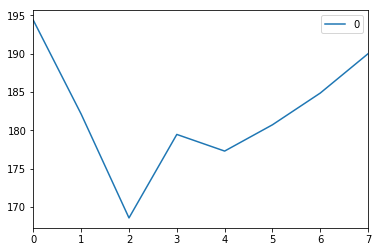

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [22]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.333333,0.166667,0.375,0.15,0.05,0.15,0.266667,0.166667,0.000000,0.000011,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.597260
1,0.066667,0.166667,0.125,0.05,0.00,0.20,0.000000,0.000000,0.000000,0.000011,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.230137
2,0.266667,0.166667,0.250,0.15,0.06,0.13,0.133333,0.166667,0.001669,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.164384
3,0.066667,0.166667,0.125,0.05,0.00,0.10,0.066667,0.150000,0.001669,0.000011,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.621918
4,0.000000,0.166667,0.125,0.05,0.00,0.20,0.000000,0.123333,0.000000,0.000011,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000


Since we are getting best rmse value as 168.56 for k =3

In [23]:
from sklearn.externals import joblib
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [24]:
from sklearn.metrics import mean_absolute_error 

mae_val = [] #to store rmse values for different k
for K in range(11):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_absolute_error(y_test,pred)) #calculate rmse
    mae_val.append(error) #store rmse values
    print('MAE value for k= ' , K , 'is:', error)


MAE value for k=  1 is: 4.49234795684408
MAE value for k=  2 is: 4.875051605359405
MAE value for k=  3 is: 5.147448747154622
MAE value for k=  4 is: 5.483884085260593
MAE value for k=  5 is: 5.723971435911405
MAE value for k=  6 is: 6.039104300422209
MAE value for k=  7 is: 6.359137876073912
MAE value for k=  8 is: 6.673857054434769
MAE value for k=  9 is: 6.917283554162555
MAE value for k=  10 is: 7.112345235100375
MAE value for k=  11 is: 7.273523283293112


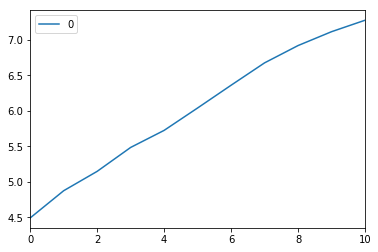

In [25]:
#plotting the mae values against k values
curve = pd.DataFrame(mae_val) #elbow curve 
curve.plot()

In [27]:
import pickle
# Dump the trained decision tree classifier with Pickle
knn_pkl_filename = 'Airbnb_data/Models/knn_regressor.pkl'
# Open the file to save as pkl file
knn_model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(model, knn_model_pkl)
# Close the pickle instances
knn_model_pkl.close()


## Predictions on the test dataset



In [ ]:
#reading test and submission files
test = pd.read_csv('Airbnb_data/test.csv')

#preprocessing test dataset
dropCols(test)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)
    
df = dataCleaning(df)
#predicting on the test set and creating submission file
predict = model.predict(test)
submission['price'] = predict

submission['price'] = predict
submission.to_csv('Airbnb_data/submit_file.csv',index=False)


In [ ]:
##  Implementing GridsearchCV 

from sklearn import metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
df = pd.read_csv('Airbnb_data/listings_BostonL.csv')

cluster_data=7f.ix[:,2:]
X=cluster_data
y=df.ix[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
# for testing the data
#Can be skipped
xdf=pd.DataFrame(X_train)
xdf.to_csv('Airbnb_data/trial/X_train.csv',index=False)

xdf=pd.DataFrame(X_test)
xdf.to_csv('Airbnb_data/trial/X_test.csv',index=False)

xdf=pd.DataFrame(y_train)
xdf.to_csv('Airbnb_data/trial/y_train.csv',index=False)

xdf=pd.DataFrame(y_test)
xdf.to_csv('Airbnb_data/trial/y_test.csv',index=False)


In [ ]:
xdf=pd.DataFrame(cluster_data)
xdf.to_csv('Airbnb_data/trial/cluster_data.csv',index=False)




In [ ]:
X=cluster_data
y=df.ix[:,'price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

X=cluster_data
y=df.ix[:,'price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [ ]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [ ]:
FeatImp.index[0:30]

In [ ]:
FeatImp['importance'].values[0:30]

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,10))
# df['price'] = df.price.str.replace("\$|,", "").astype(float)
# df['price'].hist()
sns.distplot(df['price'])
# plt.show()
mean_price = df.price.iloc[:5].mean()
mean_price
# df['host_acceptance_rate'].head()

In [ ]:
df['review_scores_rating'].fillna(0, inplace=True)
df['review_scores_rating'].dropna(axis=0, inplace=True)
sns.distplot(df['review_scores_rating'])


In [ ]:
#Correlation Plot
var = 'review_scores_rating'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price')
data.plot.scatter(x=var, y='price', ylim=(0,1500))

In [ ]:
#cluster by locations
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def plot_3D_clusters(X, k):
    """Plot 3 attributes in dataset to explore natural clusters within data"""
    estimators = {'k_means_3': KMeans(n_clusters=k)}
    fignum = 1
    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(4, 3))
        plt.clf()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        plt.cla()
        est.fit(X)
        labels = est.labels_
        # Change the 2nd column in X[:,_] to choose attributes for plotting
        ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float),edgecolor='k')
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel('latitude')
        ax.set_ylabel('longitude')
        ax.set_zlabel('price')
        fignum = fignum + 1
    plt.show()
# change the n
df = pd.read_csv('Airbnb_data/listings_Boston.csv')
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
X = np.array(df[['latitude', 'longitude', 'price']])
plot_3D_clusters(X, 4)

In [ ]:
# Transformation
# right skewed: log transform
# left skewed: power transform
df['accommodates']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN model: 5 closest neighbors
knn = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']


In [ ]:
knn.fit(X_train[cols], y_train)


In [ ]:
features_predictions = knn.predict(norm_test_df[cols])
features_mse = mean_squared_error(norm_test_df['price'], features_predictions)
features_rmse = features_mse ** (1/2)